# Are YOU a Crossfit Games Athlete? This new data will let you know if YOU ARE (a) FIT.

https://medium.com/p/e83c04eb783e/edit

In [154]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'
from pylab import rcParams
rcParams['figure.figsize'] = 25, 10
# configure Pandas to publish table schema and data in a JSON representation
# any dataframe outputted after this will display the Data Explorer
# you can turn this off later if you want to view HTML tables instead
pd.options.display.html.table_schema = True # Data Explorer On!
# the Data Explorer performs visualization in the browser,
# so we must increase the number of rows outputted in order for it to be useful
# be careful! some datasets may be too large (see contraints section)
pd.options.display.max_rows = None

In [114]:
data_path = "/Users/pblsnt/Documents/DataScientist_Nanodegree_Udacity/Data"
crossfit_data = "/crossfit_games_data"

In [115]:
def read_file_csv(filepath, header=0, sep=','):
    return pd.read_csv(filepath_or_buffer=filepath, sep=sep, header=header)

In [116]:
crossfit_open_scores_2019_file = data_path + crossfit_data + "/2019_opens_scores.csv"
crossfit_open_athletes_2019_file = data_path + crossfit_data + "/2019_opens_athletes.csv"
crossfit_open_scores_2020_file = data_path + crossfit_data + "/2020_opens_scores.csv"
crossfit_open_athletes_2020_file = data_path + crossfit_data + "/2020_opens_athletes.csv"

## What does a Crossfit Athlete look like?

In [155]:
crossfit_open_athletes_2019 = read_file_csv(crossfit_open_athletes_2019_file)
crossfit_open_athletes_2019.head()

,competitorid,competitorname,firstname,lastname,postcompstatus,gender,profilepics3key,countryoforigincode,countryoforiginname,divisionid,affiliateid,affiliatename,age,height,weight,overallrank,overallscore,is_scaled,division
0,2536,Samantha Briggs,Samantha,Briggs,accepted,F,0e63d-P2536_14-184.jpg,GB,United Kingdom,19,4098,CrossFit Black Five,37,1.70,61.23,1,33,0,Women (35-39)
1,485089,Renata Pimentel,Renata,Pimentel,accepted,F,04e97-P485089_5-184.jpg,BR,Brazil,19,15868,CrossFit Gurkha,36,1.74,73.00,2,66,0,Women (35-39)
2,16973,Carleen Mathews,Carleen,Mathews,NaN,F,b663a-P16973_6-184.jpg,US,United States,19,10471,CrossFit Saint Helens,35,1.57,62.14,3,101,0,Women (35-39)
3,751083,Danila Capaccetti,Danila,Capaccetti,NaN,F,pukie.png,IT,Italy,19,9329,CrossFit Black Shark,35,1.70,71.00,4,139,0,Women (35-39)
4,313257,Hope Cicero,Hope,Cicero,NaN,F,f204b-P313257_1-184.jpg,US,United States,19,438,CrossFit Billings,36,1.55,61.23,5,176,0,Women (35-39)


In [227]:
crossfit_open_athletes_2019.loc[crossfit_open_athletes_2019.affiliatename=='CrossFit Roude Leiw']

,competitorid,competitorname,firstname,lastname,postcompstatus,gender,profilepics3key,countryoforigincode,countryoforiginname,divisionid,affiliateid,affiliatename,age,height,weight,overallrank,overallscore,is_scaled,division
32583,1058374,Marie Robin,Marie,Robin,NaN,F,448b7-P1058374_1-184.jpg,FR,France,2,14897,CrossFit Roude Leiw,22,NaN,NaN,650,6565,0,Women
41447,1066421,Eugenia Angioni,Eugenia,Angioni,NaN,F,pukie.png,LU,Luxembourg,2,14897,CrossFit Roude Leiw,27,NaN,NaN,9514,69232,0,Women
44471,976064,Florine Schaillié,Florine,Schaillié,NaN,F,2c5ad-P976064_3-184.jpg,LU,Luxembourg,2,14897,CrossFit Roude Leiw,25,1.70,64.00,12538,86964,0,Women
77547,1216397,Morgane Henrotte,Morgane,Henrotte,NaN,F,aa71a-P1216397_2-184.jpg,LU,Luxembourg,2,14897,CrossFit Roude Leiw,28,NaN,NaN,45614,256055,0,Women
83894,1304103,Stephanie Neiertz,Stephanie,Neiertz,NaN,F,pukie.png,LU,Luxembourg,2,14897,CrossFit Roude Leiw,29,1.65,55.00,51961,284384,0,Women
90006,723177,Elodie Gramczewski,Elodie,Gramczewski,NaN,F,c225b-P723177_2-184.jpg,LU,Luxembourg,2,14897,CrossFit Roude Leiw,32,1.78,66.00,58072,310779,0,Women
106964,1549394,Laura Ambesi,Laura,Ambesi,NaN,F,pukie.png,FR,France,2,14897,CrossFit Roude Leiw,30,NaN,NaN,75031,379394,0,Women
164172,1549732,Kamila Kaczmarska,Kamila,Kaczmarska,NaN,F,cb498-P1549732_1-184.jpg,LU,Luxembourg,2,14897,CrossFit Roude Leiw,25,1.58,55.00,132218,573926,0,Women
251259,303390,David Da Silva,David,Da Silva,NaN,M,63e1b-P303390_2-184.jpg,LU,Luxembourg,1,14897,CrossFit Roude Leiw,34,1.76,81.00,4554,38490,0,Men
251774,741897,Thierry Loureiro,Thierry,Loureiro,NaN,M,86149-P741897_1-184.jpg,LU,Luxembourg,18,14897,CrossFit Roude Leiw,35,NaN,NaN,5069,42339,0,Men


In [118]:
crossfit_open_athletes_2019['category'] = crossfit_open_athletes_2019['is_scaled']
crossfit_open_athletes_2019.loc[crossfit_open_athletes_2019.is_scaled == 0, 'category'] = 'RX'
crossfit_open_athletes_2019.loc[crossfit_open_athletes_2019.is_scaled == 1, 'category'] = 'Scaled'
crossfit_open_athletes_2019.loc[crossfit_open_athletes_2019.postcompstatus=='accepted', 'category'] = 'Elite'

#### Select Meaningful Columns

In [134]:
columns_to_drop = ['competitorname'
                   , 'firstname'
                   , 'lastname'
                   , 'postcompstatus'
                   , 'profilepics3key'
                   , 'countryoforigincode'
                   , 'affiliatename'
                   , 'divisionid'
                   , 'is_scaled'
]

In [135]:
crossfit_open_athletes_2019_filtered = crossfit_open_athletes_2019.drop(columns_to_drop, axis=1)

### Athletes Characteristics

In [136]:
crossfit_open_athletes_2019_filtered.head()

,competitorid,gender,countryoforiginname,affiliateid,age,height,weight,overallrank,overallscore,division,category
0,2536,F,United Kingdom,4098,37,1.70,61.23,1,33,Women (35-39),Elite
1,485089,F,Brazil,15868,36,1.74,73.00,2,66,Women (35-39),Elite
2,16973,F,United States,10471,35,1.57,62.14,3,101,Women (35-39),RX
3,751083,F,Italy,9329,35,1.70,71.00,4,139,Women (35-39),RX
4,313257,F,United States,438,36,1.55,61.23,5,176,Women (35-39),RX


### Athlete Participation

In [169]:
top_countries_df = crossfit_open_athletes_2019_filtered.countryoforiginname.value_counts().sort_values(ascending=False).head(10)
crossfit_open_athletes_2019_filtered \
    .loc[~crossfit_open_athletes_2019_filtered.countryoforiginname.isin(top_countries_df.index.tolist()),"countryoforiginname"]= 'Other'

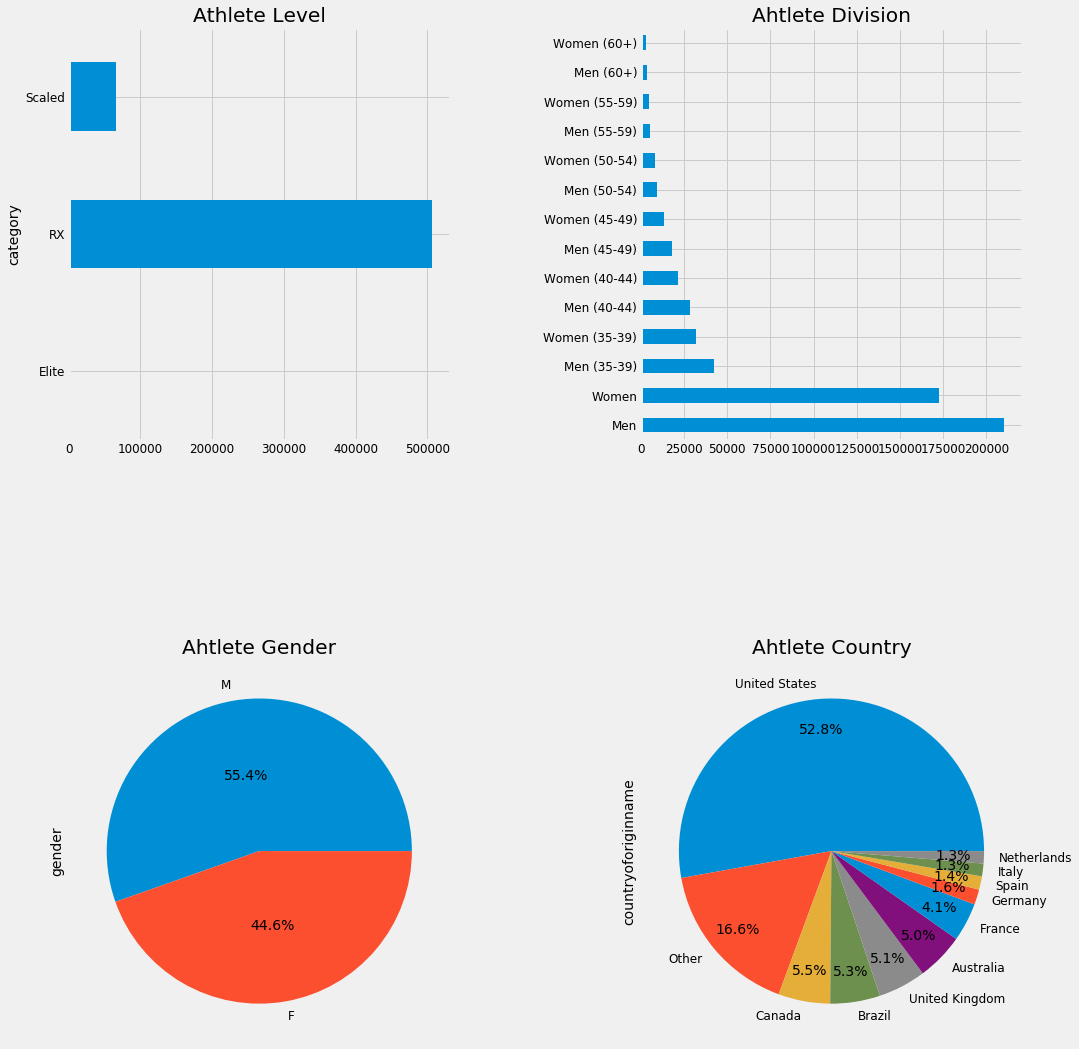

In [188]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2,figsize=(15,15))
crossfit_open_athletes_2019_filtered.groupby('category').competitorid.count().plot.barh(title='Athlete Level', ax=ax1);
crossfit_open_athletes_2019_filtered.division.value_counts().plot.barh(title="Ahtlete Division", ax=ax2);
crossfit_open_athletes_2019_filtered.gender.value_counts().plot(kind='pie'
                                                                , autopct='%1.1f%%'
                                                                , pctdistance=0.5
                                                                , title='Ahtlete Gender'
                                                                , ax=ax3);
crossfit_open_athletes_2019_filtered.countryoforiginname.value_counts().plot(kind="pie"
                                 , autopct='%1.1f%%'
                                 , pctdistance=0.8
                                 , title='Ahtlete Country'
                                 , ax=ax4);
plt.tight_layout()
fig.subplots_adjust(wspace=0.5)
fig.subplots_adjust(hspace=0.5)

In [190]:
crossfit_open_athletes_2019_filtered[['height', 'weight', 'age']].describe()

,height,weight,age
count,304823.000000,323754.000000,572653.000000
mean,1.743674,78.343412,37.164978
std,1.439308,44.720039,9.012462
min,0.010000,-9054.150000,16.000000
25%,1.670000,67.000000,31.000000
50%,1.750000,78.930000,37.000000
75%,1.800000,88.450000,43.000000
max,266.240000,16960.000000,125.000000


In [209]:
height_lower_cap = crossfit_open_athletes_2019_filtered.height.quantile(0.02) # 1.5 m
height_upper_cap = crossfit_open_athletes_2019_filtered.height.quantile(0.99) # 1.96 m
weight_lower_cap = crossfit_open_athletes_2019_filtered.weight.quantile(0.01) # 51 kg
weight_upper_cap = crossfit_open_athletes_2019_filtered.weight.quantile(0.99) # 120.2 kg
age_lower_cap = crossfit_open_athletes_2019_filtered.age.min() # 16 years
#crossfit_open_athletes_2019_filtered.loc[crossfit_open_athletes_2019_filtered.age>=90].count()
age_upper_cap = 90

In [257]:
def hammond_ideal_weight_funct(height:list, height_units:str="cm"):
    if height_units == "cm":
        return 48 + 1.1 * (100*np.array(height) - 150)
    else:
        raise NotImplementedError
        
crossfit_athletes_height = np.array(crossfit_open_athletes_2019_filtered[~crossfit_open_athletes_2019_filtered.height.isna()].height.values.tolist())
ideal_open_athletes_weight = hammond_ideal_weight_funct(crossfit_athletes_height)

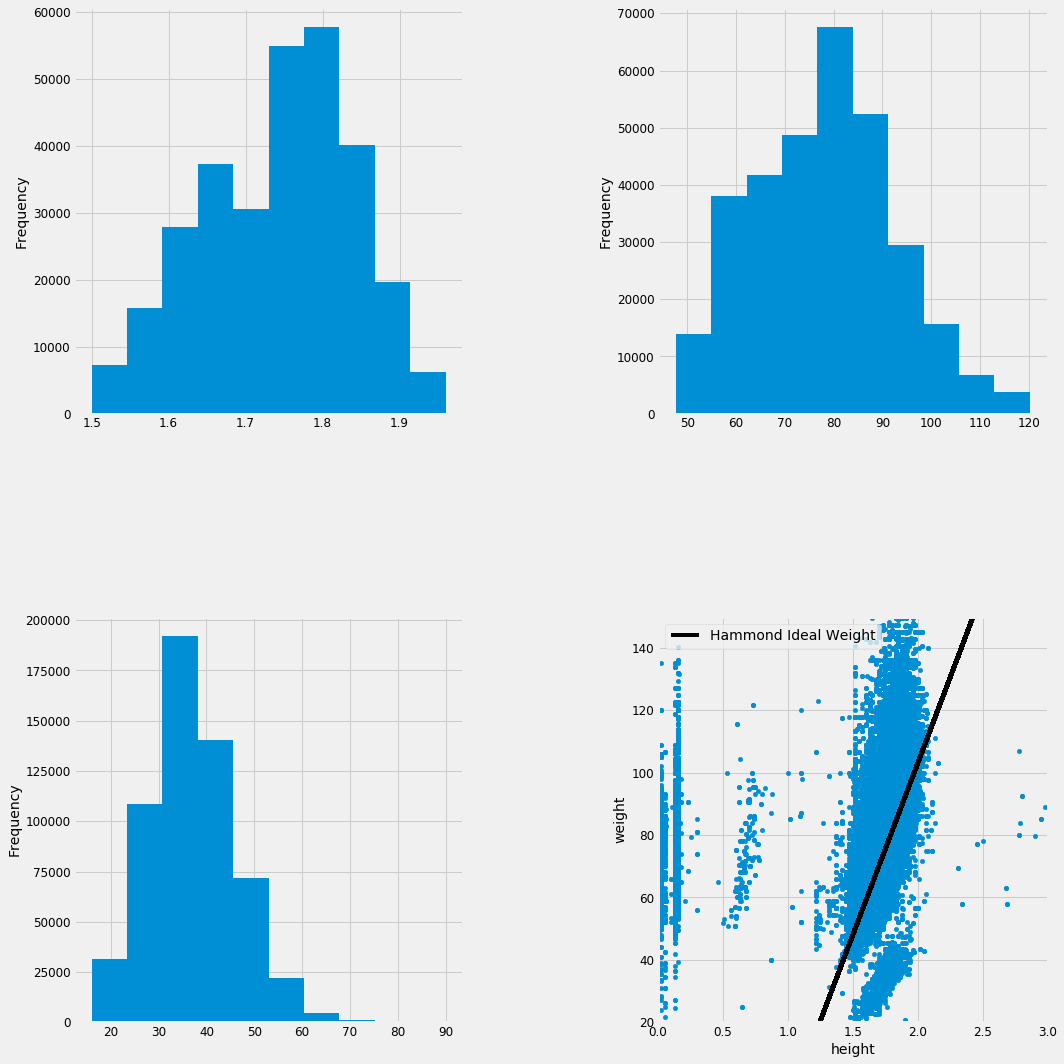

In [264]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2,figsize=(15,15))

crossfit_open_athletes_2019_filtered.height.plot.hist(bins = 10, range=(height_lower_cap, height_upper_cap), ax=ax1);

crossfit_open_athletes_2019_filtered.weight.plot.hist(bins = 10,range=(weight_lower_cap, weight_upper_cap), ax=ax2);

crossfit_open_athletes_2019_filtered.age.plot.hist(bins = 10,range=(age_lower_cap, age_upper_cap), ax=ax3);

crossfit_open_athletes_2019_filtered.plot.scatter(x='height'
                                                  , y='weight'
                                                  , xlim=(0,3)
                                                  , ylim=(20, 150)
                                                  , ax=ax4
                                                  )

ax4.plot(crossfit_athletes_height
         , ideal_open_athletes_weight, color='black'
         , label='Hammond Ideal Weight')
ax4.legend()
plt.tight_layout()
fig.subplots_adjust(wspace=0.5)
fig.subplots_adjust(hspace=0.5)

In [14]:
crossfit_open_athletes_2019_filtered \
    .loc[~crossfit_open_athletes_2019_filtered.height.between(height_lower_cap,height_upper_cap),"height"]= np.NaN

In [18]:
crossfit_open_athletes_2019_filtered \
    .loc[~crossfit_open_athletes_2019_filtered.weight.between(weight_lower_cap,weight_upper_cap),"weight"]= np.NaN

In [22]:
crossfit_open_athletes_2019_filtered.isna().mean()

competitorid           0.000000
gender                 0.000000
countryoforiginname    0.000000
affiliateid            0.000000
age                    0.000000
height                 0.480642
weight                 0.444631
overallrank            0.000000
overallscore           0.000000
is_scaled              0.000000
division               0.000000
dtype: float64

In [9]:
crossfit_open_athletes_2019_filtered.isna().mean()

competitorid           0.000000
gender                 0.000000
countryoforiginname    0.000000
affiliateid            0.000000
age                    0.000000
height                 0.467700
weight                 0.434642
overallrank            0.000000
overallscore           0.000000
is_scaled              0.000000
division               0.000000
dtype: float64

In [10]:
crossfit_open_athletes_2019_filtered[crossfit_open_athletes_2019_filtered.height.isna()].weight.isna().mean()

0.8797408804092148

In [224]:
crossfit_open_scores_2019 = read_file_csv(crossfit_open_scores_2019_file)
crossfit_open_scores_2019.head()

,affiliate,breakdown,competitorid,division,is_scaled,judge,ordinal,rank,scaled,score,scoredisplay,scoreidentifier,time
0,CrossFit RDU,9 rounds +\n10 wall-ball shots\n,96511,Men (45-49),0,Erin Miller,1,1,0,13520000,352 reps,27f30f9a8c0a564ae799,NaN
1,CrossFit RDU,Within 16 minutes:\n3 rounds +\n25 toes-to-bar...,96511,Men (45-49),0,Harper Thorsen,2,4,0,13420368,342 reps,0ed3d1264f25a8f1890d,NaN
2,CrossFit RDU,200-ft. OH lunge\n50 box step-ups\n50 strict H...,96511,Men (45-49),0,Harper Thorsen,3,1,0,11800018,9:42,f2a143399a330c95321b,582.0
3,CrossFit RDU,132 reps\n6 rounds,96511,Men (45-49),0,Harper Thorsen,4,36,0,11320009,11:51,89101e401c6c85997363,711.0
4,CrossFit RDU,210 reps,96511,Men (45-49),0,Harper Thorsen,5,1,0,12100573,10:27,f7588c9174f1fe90f5c4,627.0


In [229]:
crossfit_open_scores_2019.loc[crossfit_open_scores_2019.competitorid==976064]

,affiliate,breakdown,competitorid,division,is_scaled,judge,ordinal,rank,scaled,score,scoredisplay,scoreidentifier,time
466640,CrossFit Roude Leiw,6 rounds +\n19 wall-ball shots\n2-cal. row\n,976064,Women,0,Stephane Gehin,1,15188,0,12490000,249 reps,2867a39cf2d357eb682b,NaN
466641,CrossFit Roude Leiw,Within 8 minutes:\n1 round +\n25 toes-to-bars\...,976064,Women,0,Dani Gomes,2,21651,0,11690766,169 reps,20cca054f1c67c6e748b,NaN
466642,CrossFit Roude Leiw,200-ft. OH lunge\n50 box step-ups\nTiebreak: 5:08,976064,Women,0,Dani Gomes,3,26435,0,10900292,90 reps,a0ae73432a0c9fd541ea,NaN
466643,CrossFit Roude Leiw,4 rounds +\n2 bar MUs\nTiebreak: 4:21,976064,Women,0,Dani Gomes,4,11511,0,10900459,90 reps,251738d137e059bd9ac6,NaN
466644,CrossFit Roude Leiw,Round of 15\n\n,976064,Women,0,Dani Gomes,5,12179,0,11920000,192 reps,294278d5696ce6a2f416,NaN


In [13]:
def join_df(left_df, right_df, on, how='inner', left_suffix='_left', right_suffix='_right'):
    return left_df.join(other=right_df, on=on, how=how, lsuffix=left_suffix, rsuffix=right_suffix)